<a href="https://colab.research.google.com/github/Saharsh979/Galaxy_Classification_Using_CNN_Tensorflow_Keras_Updated/blob/master/Galaxy_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
Dataset = '/content/drive/MyDrive/Dataset 60 New'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from glob import glob
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image
import PIL
import cv2
from keras.constraints import maxnorm
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
total_images = 0
for c in ['Disk Galaxy', 'Elliptical Galaxy', 'Irregular Galaxy', 'Lenticular Galaxy', 'Spiral Galaxy']:
  total_images += len(os.listdir(os.path.join(Dataset, c)))
print('Total:', total_images)

Total: 300


In [ ]:
Dataset

'/content/drive/MyDrive/Dataset 60 New'

In [ ]:
import pathlib
data_dir = pathlib.Path(Dataset)
data_dir

PosixPath('/content/drive/MyDrive/Dataset 60 New')

In [ ]:
Galaxy_images_dict= {
    'disk': list(data_dir.glob('Disk Galaxy/*')),
    'elliptical': list(data_dir.glob('Elliptical Galaxy/*')),
    'irregular': list(data_dir.glob('Irregular Galaxy/*')),
    'lenticular': list(data_dir.glob('Lenticular Galaxy/*')),
    'spiral':list(data_dir.glob('Spiral Galaxy/*')),
}
Galaxy_labels_dict = {
    'disk':0,
    'elliptical': 1,
    'irregular': 2,
    'lenticular': 3,
    'spiral': 4,
}

In [ ]:
img =  cv2.imread(str(Galaxy_images_dict['disk'][4]))

In [ ]:
img.shape

(300, 300, 3)

In [ ]:
X, y = [],[]

for Galaxy_name, images in Galaxy_images_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img =  cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(Galaxy_labels_dict[Galaxy_name])

In [ ]:
X =  np.array(X)
y = np.array(y)

In [ ]:
X.shape

(300, 180, 180, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
    layers.Conv2D(180,(3,3), padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(190,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(200,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),  
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(200, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(400, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(num_classes)    
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)
model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 89s 12s/step - loss: 1.6336 - accuracy: 0.2090
Epoch 2/50
7/7 [==============================] - 87s 12s/step - loss: 1.4837 - accuracy: 0.3930
Epoch 3/50
7/7 [==============================] - 87s 12s/step - loss: 1.2132 - accuracy: 0.4925
Epoch 4/50
7/7 [==============================] - 87s 12s/step - loss: 0.9107 - accuracy: 0.6468
Epoch 5/50
7/7 [==============================] - 87s 12s/step - loss: 0.5597 - accuracy: 0.7910
Epoch 6/50
7/7 [==============================] - 87s 12s/step - loss: 0.3737 - accuracy: 0.8806
Epoch 7/50
7/7 [==============================] - 87s 12s/step - loss: 0.1247 - accuracy: 0.9602
Epoch 8/50
7/7 [==============================] - 87s 12s/step - loss: 0.0675 - accuracy: 0.9851
Epoch 9/50
7/7 [==============================] - 87s 12s/step - loss: 0.0892 - accuracy: 0.9701
Epoch 10/50
7/7 [==============================] - 87s 12s/step - loss: 0.1016 - accuracy: 0.9701
Epoch 11/50
7/7 [============

In [ ]:
model.evaluate(X_test_scaled,y_test)
model.summary()

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_predict =  model.predict(X_test_scaled)
y_predict_classes = [np.argmax(element) for element in y_predict]
print("Classification Report: \n", classification_report(y_test, y_predict_classes))
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_classes)
cm

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.47      0.44      0.46        18
           2       0.68      0.89      0.77        19
           3       0.82      0.52      0.64        27
           4       0.58      0.82      0.68        17

    accuracy                           0.66        99
   macro avg       0.66      0.67      0.65        99
weighted avg       0.68      0.66      0.65        99



<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[12,  0,  5,  0,  1],
       [ 1,  8,  3,  2,  4],
       [ 1,  1, 17,  0,  0],
       [ 2,  6,  0, 14,  5],
       [ 0,  2,  0,  1, 14]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

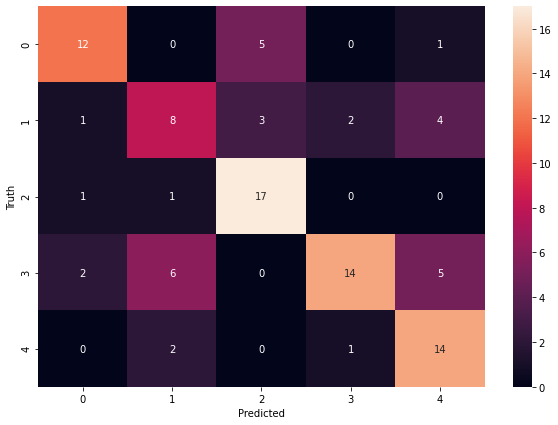

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
layer = model.layers
filters, biases = model.layers[4].get_weights()
print(layer[4].name, filters.shape)

In [ ]:
fig1 = plt.figure(figsize = (4,4))
columns=5
rows = 5
n_filters = columns*rows
for i in range(1, n_filters + 1):
  f =  filters[:, :, :, i-1]
  fig1 = plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0], cmap='gray')

plt.show()

In [ ]:
conv_layer_index = [0,2,4]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Dataset 30 New/Spiral Galaxy/thumb-IC2486.png', target_size=(180, 180)) #VGG user 224 as input

In [ ]:
img

In [ ]:
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)
# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

In [ ]:
columns = 5
rows = 5
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(8,8))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(hist.epoch, hist.history['loss'], label='Training Loss')
plt.plot(
    hist.epoch, hist.history['loss'], label='Validation', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()